<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/06_class_scikit_learn%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [41]:
iris = load_iris()

In [42]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [43]:
df['species'] = pd.Series(iris.target)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


학습시킬데이터를 가지는 새로운 데이터프레임 만들기

In [45]:
sl_df = pd.DataFrame()

In [46]:
sl_df['sepal_length'] = df['sepal length (cm)']
sl_df['species'] = df['species']
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   species       150 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [47]:
sl_df = sl_df[:100]
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   species       100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [48]:
sl_df.describe()

,sepal_length,species
count,100.000000,100.000000
mean,5.471000,0.500000
std,0.641698,0.502519
min,4.300000,0.000000
25%,5.000000,0.000000
50%,5.400000,0.500000
75%,5.900000,1.000000
max,7.000000,1.000000


학습시킬데이터를 가지는 새로운 데이터프레임 만들기 
* 데이터 확인

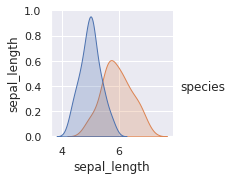

In [49]:
sns.pairplot(sl_df, hue = 'species')

학습데이터와 테스트데이터 나누기

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(sl_df.iloc[:,:1], sl_df.iloc[:,1:], test_size = 0.33)

모듈 import, 모델 인스턴스화

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression()

데이터를 특징과 대상 벡터로 배치

In [54]:
X_train.shape

(67, 1)

In [55]:
y_train.shape

(67, 1)

In [56]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

결과확인

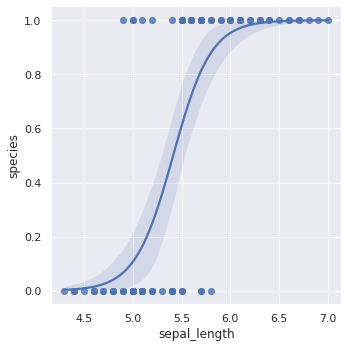

In [57]:
import seaborn as sns
sns.set()
sns.lmplot(x='sepal_length', y='species', data = sl_df, logistic= True)

학습된 데이터에 대한 성능 평가하기

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(confusion_matrix(y_train, lr.predict(X_train)))

[[31  4]
 [ 3 29]]


In [60]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.88      0.91      0.89        32

    accuracy                           0.90        67
   macro avg       0.90      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67

